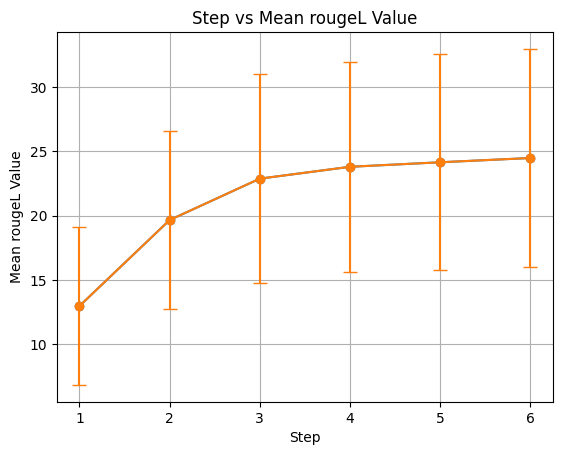

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import json


def load_all_metrics(directory):
    all_values = []

    for root, _, files in os.walk(directory):
        for file in files:
            if file == 'metrics.json':
                file_path = os.path.join(root, file)

                with open(file_path, 'r') as f:
                    values = []
                    for line in f:
                        data = json.loads(line)

                        if data["name"] == "rougeL":
                            values.append(data["value"])

                    if len(values) == 6:
                        all_values.append(values)

    # Calculate standard deviation values for each step
    std_values = np.std(all_values, axis=0)

    # Calculate mean values for each step
    mean_values = np.mean(all_values, axis=0)

    # Plot step vs mean value
    steps = np.arange(1, len(mean_values) + 1)
    plt.plot(steps, mean_values, marker='o')
    # Plot step vs standard deviation value
    plt.errorbar(steps, mean_values, yerr=std_values, fmt='-o', capsize=5)
    plt.xlabel('Step')
    plt.ylabel('Mean rougeL Value')
    plt.title('Step vs Mean rougeL Value')
    plt.grid(True)
    plt.show()
    return all_values


directory = '/data/alsordon/kms/12747ce6'
all_values = load_all_metrics(directory)

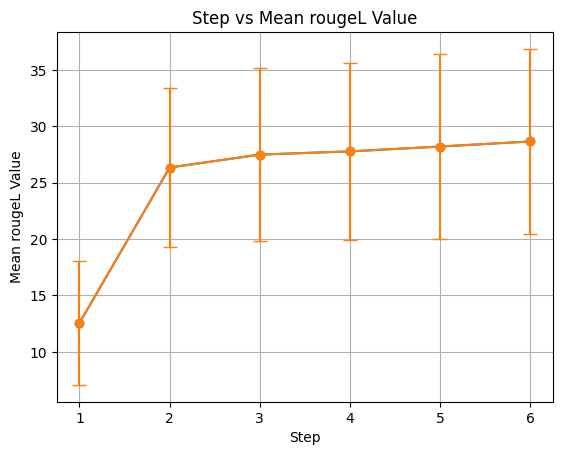

In [12]:
directory = '/data/alsordon/kms/d9c0b0cd'
all_values = load_all_metrics(directory)

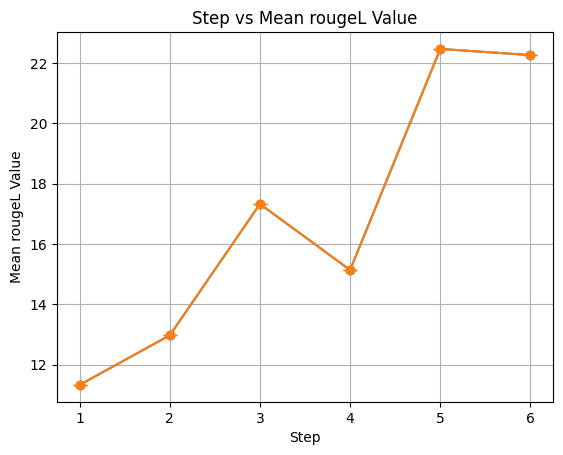

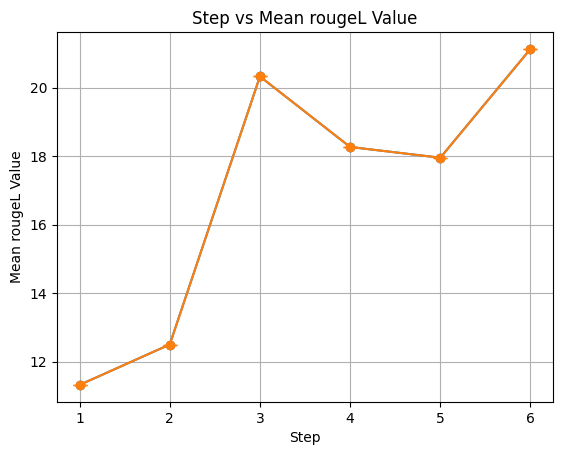

In [2]:

all_values = load_all_metrics('test_summ_iter')
all_values = load_all_metrics('test_summ_iter_nokm/')